<a href="https://colab.research.google.com/github/vishwa-vibhi/Machine_Learning/blob/main/ML_lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **To visualize individual decision trees from the
Random Forest, the sklearn.tree library provides a function called plot_tree.**

**plot_tree(rf.estimators_[0], filled=True, feature_names=X.columns, class_names=str(np.unique(y)), rounded=True)**

1.   rf.estimators_ is a list of the decision trees that make up the Random Forest. We are plotting the first tree here (rf.estimators_[0]).
2.  plot_tree visualizes the decision tree, showing how it splits on different features.
3.  The filled=True parameter colors the nodes based on the class, and feature_names and class_names are labels to display the feature names and class labels, respectively.




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
126 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/util

Best Hyperparameters: {'n_estimators': np.int64(200), 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
R^2 score on the test data: 0.3599449980922844


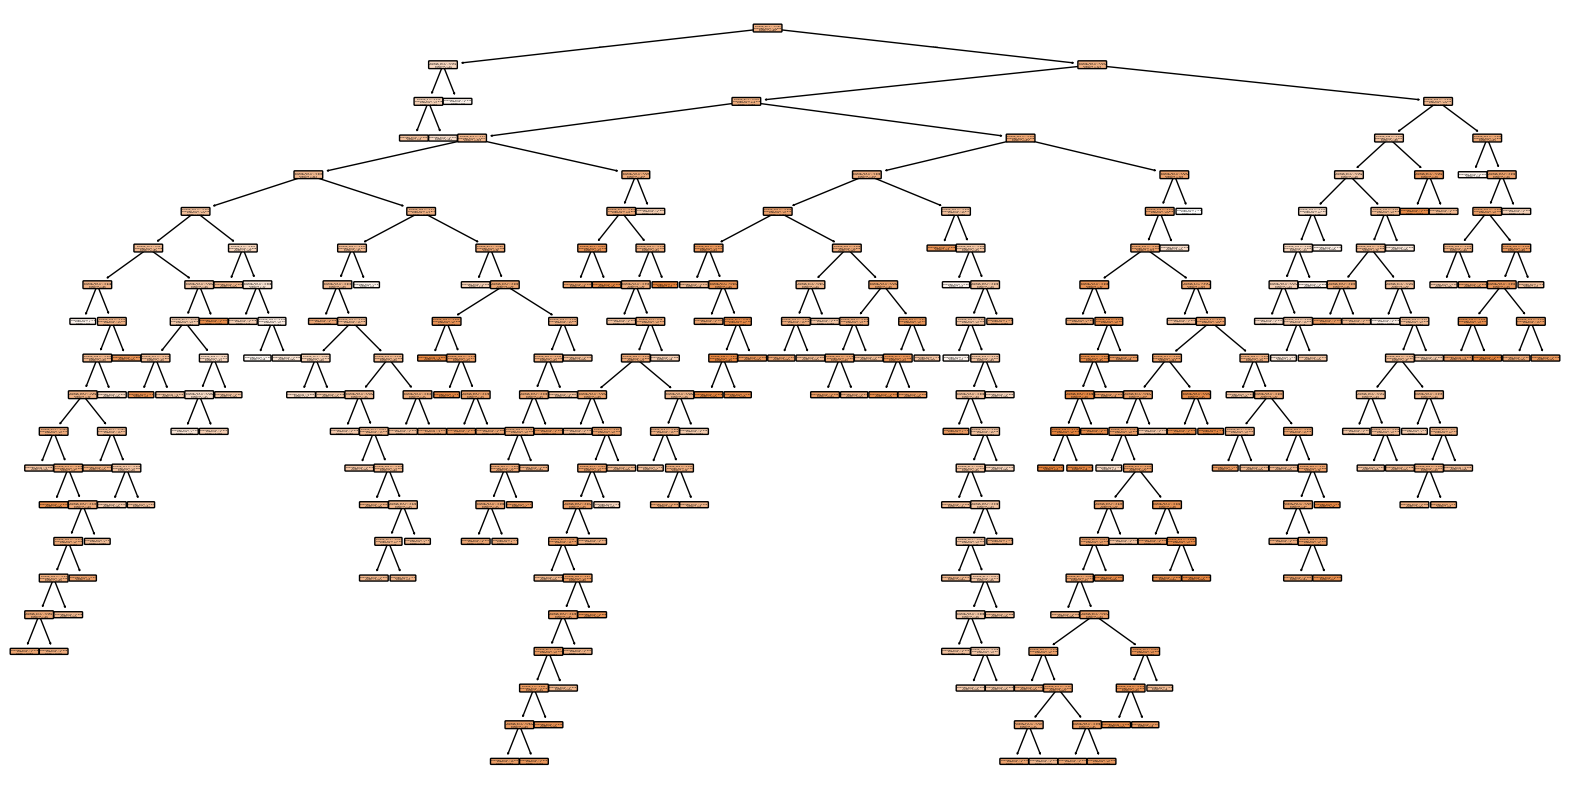

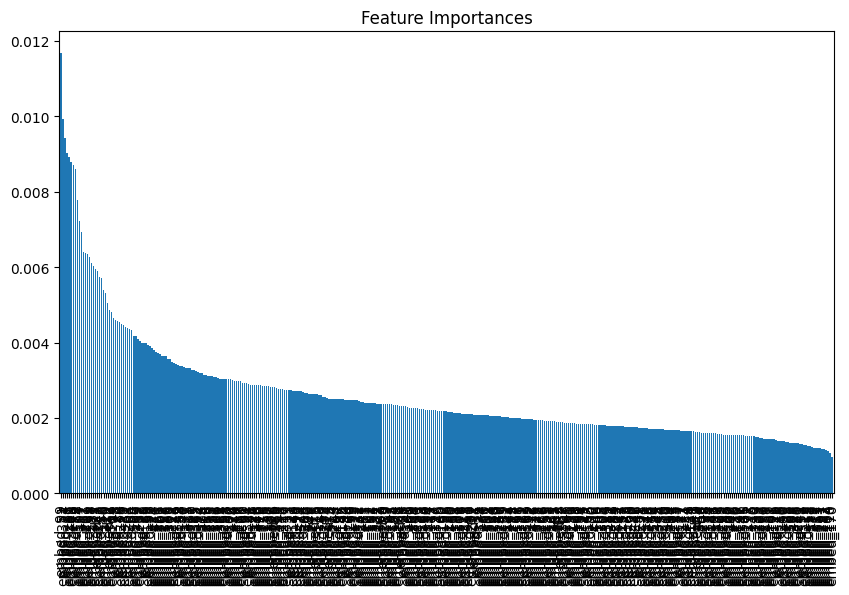

In [11]:
# Import necessary libraries
from google.colab import drive
drive.mount('/content/drive')

!pip install matplotlib scikit-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load your dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML/training_mathbert.xlsx')

# Separating features (X) and target (y)
X = df.drop(columns=['output'])  # Features
y = df['output']  # Target

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the hyperparameters for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether bootstrap sampling is used
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Number of different hyperparameter combinations to try
    cv=3,  # Cross-validation splitting strategy
    verbose=2,  # To show progress
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best hyperparameters found by RandomizedSearchCV
print(f"Best Hyperparameters: {random_search.best_params_}")

# Get the best model found
best_rf_model = random_search.best_estimator_

# Evaluate the model on the test data
test_score = best_rf_model.score(X_test, y_test)
print(f"R^2 score on the test data: {test_score}")

# Plot one of the trees from the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(best_rf_model.estimators_[0], filled=True, feature_names=X_train.columns, rounded=True)
plt.show()

# Visualizing the feature importance from the best model
importances = best_rf_model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
